In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/PD/NewSpiral.csv')

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
df['ID_PATIENT'].value_counts()

23     8
31     8
5      8
59     4
21     4
143    4
38     4
47     4
53     4
235    4
253    4
261    4
268    4
273    4
281    4
247    4
149    4
157    4
165    4
186    4
192    4
196    4
207    4
218    4
203    4
224    4
153    4
176    4
181    4
230    4
138    4
22     4
20     4
76     4
19     4
301    4
102    4
305    4
104    4
127    4
297    4
299    4
98     4
78     4
80     4
86     4
1      4
2      4
3      4
4      4
6      4
7      4
8      4
9      4
11     4
12     4
13     4
14     4
15     4
16     4
17     4
18     4
187    4
Name: ID_PATIENT, dtype: int64

In [ ]:
df.head(5)

,_ID_EXAM,ID_PATIENT,CLASS_TYPE,GENDER,RIGH/LEFT-HANDED,AGE,RMS,MAX_BETWEEN_ET_HT,MIN_BETWEEN_ET_HT,STD_DEVIATION_ET_HT,MRT,MAX_HT,MIN_HT,STD_HT,CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT
0,H1,59,1,M,R,58,14900.772670,13207.241210,40856.39894,0.087041,56.978320,192.737170,0.026662,4394.307090,0.120773
1,H2,76,1,M,R,60,6076.106534,9440.754502,36137.73814,0.065872,39.597318,169.753376,0.266595,2031.447046,0.172414
2,H3,301,1,F,R,56,12220.462340,12247.263300,39871.73569,0.000000,46.183810,192.536776,0.007857,3843.754479,0.123894
3,H4,102,1,M,R,24,4810.072073,4904.029458,32262.38975,0.044374,31.485790,200.401229,0.114530,1586.941716,0.162011
4,H5,305,1,M,R,79,5458.875925,5911.591981,31795.46792,0.040906,47.231442,134.897863,0.026703,2251.866128,0.202899


In [ ]:
df.drop(columns='IMAGE_NAME',inplace=True)

In [ ]:
pd.pivot_table(df,index='CLASS_TYPE',values='AGE',aggfunc=np.mean)

,AGE
CLASS_TYPE,
1,44.057143
2,57.838710


In [ ]:
df['CLASS_TYPE'].value_counts()

1    140
2    124
Name: CLASS_TYPE, dtype: int64

In [ ]:
pd.pivot_table(df,index='CLASS_TYPE',values='RMS',aggfunc=np.mean)

,RMS
CLASS_TYPE,
1,6283.068098
2,4781.939637


In [ ]:
pd.pivot_table(df,index='CLASS_TYPE',values='MAX_BETWEEN_ET_HT',aggfunc=np.mean)

,MAX_BETWEEN_ET_HT
CLASS_TYPE,
1,7187.910232
2,6863.717790


In [ ]:
import numpy as nm  
import matplotlib.pyplot as plt

In [ ]:
Y=df['CLASS_TYPE']

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
df.GENDER= le.fit_transform(df.GENDER.values)

In [ ]:
df['RIGH/LEFT-HANDED'] = le.fit_transform(df['RIGH/LEFT-HANDED'].values)

In [ ]:
X=df

In [ ]:
X.columns

Index(['_ID_EXAM', 'IMAGE_NAME', 'ID_PATIENT', 'CLASS_TYPE', 'GENDER',
       'RIGH/LEFT-HANDED', 'AGE', 'RMS', 'MAX_BETWEEN_ET_HT',
       'MIN_BETWEEN_ET_HT', 'STD_DEVIATION_ET_HT', 'MRT', 'MAX_HT', 'MIN_HT',
       'STD_HT', 'CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT'],
      dtype='object')

In [ ]:
X.drop(columns=['_ID_EXAM','ID_PATIENT'],inplace=True)

In [ ]:
X.drop(columns=['CLASS_TYPE'],inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.25, random_state=0)  

In [ ]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)      

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred= classifier.predict(x_test)  

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  


In [ ]:
classifier.score(x_train, y_train)

0.8131313131313131

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlc=MLPClassifier(hidden_layer_sizes=(150,175,100,50,30), max_iter=5000,random_state=0,alpha=0.0001,solver="lbfgs",verbose=True) 

In [ ]:
mlc.fit(x_train,y_train)


MLPClassifier(hidden_layer_sizes=(150, 175, 100, 50, 30), max_iter=5000,
              random_state=0, solver='lbfgs', verbose=True)

In [ ]:
train_acc_cla=mlc.score(x_train,y_train)

In [ ]:
print(train_acc_cla)

1.0


In [ ]:
mlc.fit(x_test,y_test)
test_acc_cla=mlc.score(x_test,y_test)


In [ ]:
print(test_acc_cla)

1.0


In [ ]:
y_pred = mlc.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm_df = pd.DataFrame(cm,
                     index = ['healthy','PD'], 
                     columns = ['healthy','PD'])

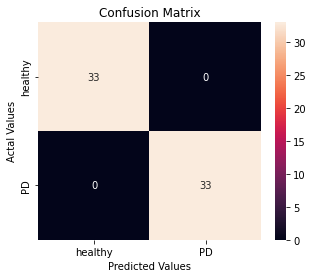

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
import seaborn as sns

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear','poly']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [100,150],
            'randomforestclassifier__criterion': ['gini','entropy']


        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(multi_class='auto'),
        'params': {
            'logisticregression__C': [1,0.5,0.2],
            'logisticregression__solver':['liblinear']

        }
    }
}

In [ ]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df1 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df1

,model,best_score,best_params
0,svm,0.838333,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.828077,{'randomforestclassifier__criterion': 'entropy...
2,logistic_regression,0.788077,"{'logisticregression__C': 0.5, 'logisticregres..."


In [ ]:
 from sklearn.ensemble import AdaBoostClassifier

In [ ]:
 clf1 = AdaBoostClassifier(n_estimators=100, random_state=0)

In [ ]:
clf1.fit(X, Y)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [ ]:
clf1.score(X, Y)

1.0

In [ ]:
dm=pd.read_csv('/content/drive/MyDrive/PD/NewMeander.csv')

In [ ]:
dm.head(5)

,_ID_EXAM,IMAGE_NAME,ID_PATIENT,CLASS_TYPE,GENDER,RIGH/LEFT-HANDED,AGE,RMS,MAX_BETWEEN_ET_HT,MIN_BETWEEN_ET_HT,STD_DEVIATION_ET_HT,MRT,MAX_HT,MIN_HT,STD_HT,CHANGES_FROM_NEGATIVE_TO_POSITIVE_BETWEEN_ET_HT
0,H1,mea1-H1.jpg,59,1,M,R,58,7434.180108,10120.222430,42913.38070,0.071112,48.761320,203.049894,0.119590,2236.376294,0.114428
1,H2,mea1-H2.jpg,76,1,M,R,60,10132.444470,11923.713750,64317.66969,0.581945,31.231012,212.489845,0.029351,1658.672664,0.064394
2,H3,mea1-H3.jpg,301,1,F,R,56,5320.969169,8443.270014,39979.95076,0.000388,54.281633,227.843584,0.757457,3148.250320,0.158879
3,H4,mea1-H4.jpg,102,1,M,R,24,8659.652924,13558.029200,69319.27081,0.008113,52.104352,185.538482,0.220402,2606.647576,0.127358
4,H5,mea1-H5.jpg,305,1,M,R,79,7293.018199,7531.636413,34595.02260,0.102315,40.991308,198.680893,0.071312,3193.983137,0.155660


In [ ]:
Y1=dm['CLASS_TYPE']

In [ ]:
dm.GENDER= le.fit_transform(dm.GENDER.values)

In [ ]:
dm['RIGH/LEFT-HANDED'] = le.fit_transform(dm['RIGH/LEFT-HANDED'].values)

In [ ]:
X1=dm

In [ ]:
X1.drop(columns=['_ID_EXAM','IMAGE_NAME','ID_PATIENT'],inplace=True)

In [ ]:
X1.drop(columns=['CLASS_TYPE'],inplace=True)

In [ ]:
mlc.fit(X1,Y1)


MLPClassifier(hidden_layer_sizes=(150, 175, 100, 50, 30), max_iter=5000,
              random_state=0, solver='lbfgs', verbose=True)

In [ ]:
train_acc_cla1=mlc.score(X1,Y1)